In [1]:
import iplantuml

Writing output for /Users/sch/Hubs/python_lab/8fa24a19-9777-4871-9f4f-9ff019abde9d.uml to 8fa24a19-9777-4871-9f4f-9ff019abde9d.svg


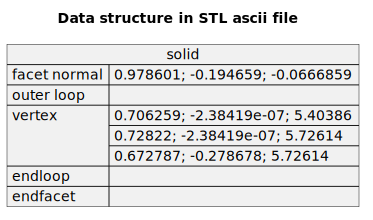

In [2]:
%%plantuml
@startuml
title Data structure in STL ascii file
json solid {
   "facet normal":"0.978601; -0.194659; -0.0666859",
   "outer loop":"",
   "vertex": ["0.706259; -2.38419e-07; 5.40386", "0.72822; -2.38419e-07; 5.72614", "0.672787; -0.278678; 5.72614"],
   "endloop":"",
   "endfacet":""
}
@enduml

Data structure in STL ascii file

solid chess_pawn
 facet normal 0.978601 -0.194659 -0.0666859
  outer loop
  vertex 0.706259 -2.38419e-07 5.40386
  vertex 0.72822 -2.38419e-07 5.72614
  vertex 0.672787 -0.278678 5.72614
  endloop
 endfacet

 facet normal 0.978602 -0.194658 -0.0666849
  outer loop
  vertex 0.672787 -0.278678 5.72614
  vertex 0.652498 -0.270274 5.40386
  vertex 0.706259 -2.38419e-07 5.40386
  endloop
 endfacet

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

class LoadSTLFile:
    def __init__(self, filename):
        self.filename = filename
        self.stlcontent = []
        self.vertices = []
        self.name = ""

    def read_file(self):
        try:
            with open(self.filename, "r") as stlfile:
                self.stlcontent = [line.strip() for line in stlfile.readlines() if line.strip()]
                self.name = self.stlcontent[0][6:]
        except FileNotFoundError:
            raise FileNotFoundError(f"File '{self.filename}' not found.")
        except Exception as e:
            raise Exception(f"An error occurred while reading the file: {str(e)}")

    def read_normals(self):
        if not self.stlcontent:
            self.read_file()
        normals = [line for line in self.stlcontent if 'facet normal' in line]
        coord_normals = np.array([line.split()[2:] for line in normals], dtype=float)
        return coord_normals

    def read_vertices(self):
        if not self.stlcontent:
            self.read_file()
        facet_total = len(self.read_normals())
        self.vertices = [line for line in self.stlcontent if 'vertex' in line]
        coord_vertices_all = np.array([line.split()[1:] for line in self.vertices], dtype=float)
        coord_vertices = coord_vertices_all.reshape((3, facet_total, 3), order='F').transpose(1, 2, 0)
        self.coord_vertices = coord_vertices
        return coord_vertices

    def plot_3d_line(self, label=None, color='b'):
        if not self.vertices:
            self.read_vertices()
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for n in range(len(self.read_normals())):
            x = np.empty(4)
            y = np.empty(4)
            z = np.empty(4)
            # Define 3D line data
            x = np.append(self.coord_vertices[n,0], self.coord_vertices[n,0,0])
            y = np.append(self.coord_vertices[n,1], self.coord_vertices[n,1,0])
            z = np.append(self.coord_vertices[n,2], self.coord_vertices[n,2,0])
            # Plot the 3D line
            ax.plot(x, y, z, label=label, color=color)
        # Customize the plot
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
        ax.set_title('STL Plot')
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.set_zlim(0, 10)
        # Display the plot
        plt.show()
    

In [9]:
filename = "chess_pawn_ascii.stl"
loader = LoadSTLFile(filename)
normals = loader.read_normals()
vertices = loader.read_vertices()
print(f"Normals: \n{normals}\n\nVertices: \n{vertices}")

Normals: 
[[ 0.978601  -0.194659  -0.0666859]
 [ 0.978602  -0.194658  -0.0666849]
 [ 0.964143  -0.19178    0.183434 ]
 ...
 [ 0.505984   0.100646   0.856651 ]
 [ 0.858089   0.170684   0.484303 ]
 [ 0.85809    0.170684   0.484303 ]]

Vertices: 
[[[ 7.06259e-01  7.28220e-01  6.72787e-01]
  [-2.38419e-07 -2.38419e-07 -2.78678e-01]
  [ 5.40386e+00  5.72614e+00  5.72614e+00]]

 [[ 6.72787e-01  6.52498e-01  7.06259e-01]
  [-2.78678e-01 -2.70274e-01 -2.38419e-07]
  [ 5.72614e+00  5.40386e+00  5.40386e+00]]

 [[ 2.49344e+00  2.46329e+00  2.27578e+00]
  [-1.90735e-06 -9.53674e-07 -9.42661e-01]
  [ 1.70750e+00  1.86597e+00  1.86597e+00]]

 ...

 [[ 1.32461e+00  1.53323e+00  1.41652e+00]
  [-2.38419e-07 -4.76837e-07  5.86741e-01]
  [ 7.00932e+00  6.88610e+00  6.88610e+00]]

 [[ 1.03459e+00  8.62513e-01  9.33577e-01]
  [ 4.28539e-01  3.57264e-01  0.00000e+00]
  [ 3.99116e+00  4.32116e+00  4.32116e+00]]

 [[ 9.33577e-01  1.11983e+00  1.03459e+00]
  [ 0.00000e+00 -4.76837e-07  4.28539e-01]
  [ 4.321

## Coordonee Normals
[
 [x1, y1, z1],
 [x2, y2, z2],
 [x3, y3, z3],
 ............,
 [xn, yn, zn],
]
## Coordonee Vertex
[
 [[x01, x02, x03],
  [y01, y02, y03],
  [z01, z02, z03],],
 [[x11, x12, x13],
  [y11, y12, y13],
  [z11, z12, z13],],
 [[x21, x22, x23],
  [y21, y22, y23],
  [z21, z22, z23],],
  .................
 [[xn1, xn2, xn3],
  [yn1, yn2, yn3],
  [zn1, zn2, zn3],],

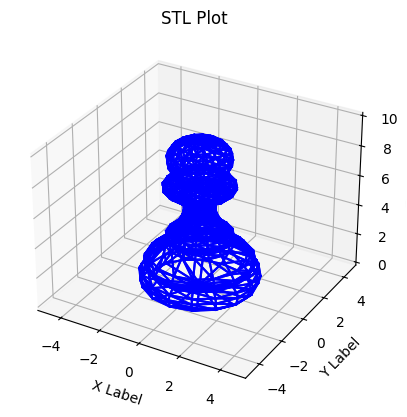

In [5]:
loader.plot_3d_line(label="STL Plot", color='b')

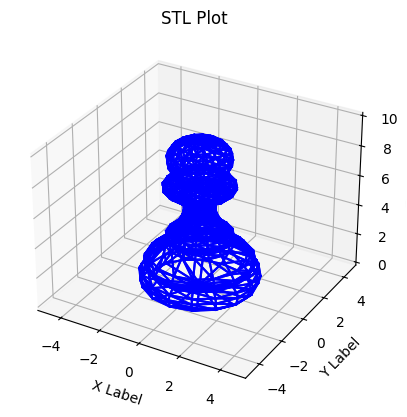

In [94]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for n in range(vertices.shape[0]):
    x = np.empty(4)
    y = np.empty(4)
    z = np.empty(4)
    # Define 3D line data
    x = np.append(vertices[n,0], vertices[n,0,0])
    y = np.append(vertices[n,1], vertices[n,1,0])
    z = np.append(vertices[n,2], vertices[n,2,0])
    # Plot the 3D line
    ax.plot(x, y, z, 'b')

# Customize the plot
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('STL Plot')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(0, 10)

# Display the plot
plt.show()